## 1994 US Census Data - Predicting if income exceeds $50,000 per year

The US Adult Census dataset is a repository of 32 561 entries extracted from the 1994 US
Census database (https://archive.ics.uci.edu/ml/datasets/Adult). 
Each entry contains the following information
about an individual:
- age : the age of an individual
- workclass : a general term to represent the employment status of an individual
- fnlwgt : final weight. In other words, this is the number of people the census believes the entry represents..
- education : the highest level of education achieved by an individual.
- education_num: the highest level of education achieved in numerical form.
- marital_status: marital status of an individual
- occupation : the general type of occupation of an individual
- relationship : represents what this individual is relative to others.
- race : Descriptions of an individual’s ethny
- sex : the biological sex of the individual
- capital_gain: capital gains for an individual
- capital_loss: capital loss for an individual
- hours_per_week: the hours an individual has reported to work per week
- nativecountry: country of origin for an individual
- label : whether or not an individual makes more than $50,000 annually.

With this dataset, we propose to perform a classification study thanks to Machine Learning to predict if an individual earns more than $50 000 in 1994.

First, we explore the data in order to understand any trends.
After a step of data cleaning, we feature the dataset and prepare it before setting up a pipelines of models with relevant hyperparameters.
Then, models are trained and evaluated through cross-validation on a train set with 80% of the dataset.
Finally, the best model is selected and evaluated on the test set for insight and analysis

http://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf

https://archive.ics.uci.edu/ml/datasets/Adult

## Library Imports 

In [218]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# Pickle for saving model files
import pickle

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Function for splitting training and test set
from sklearn.model_selection import train_test_split    

# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# StandardScaler
from sklearn.preprocessing import StandardScaler

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# Classification metrics
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

# warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Exploratory Analysis

In [203]:
df = pd.read_csv('adult_data3.csv', sep=';', encoding="latin-1")
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [204]:
df.shape

(32561, 15)

Dataset have 32 561 observations and 15 features

In [205]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [206]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
label             object
dtype: object

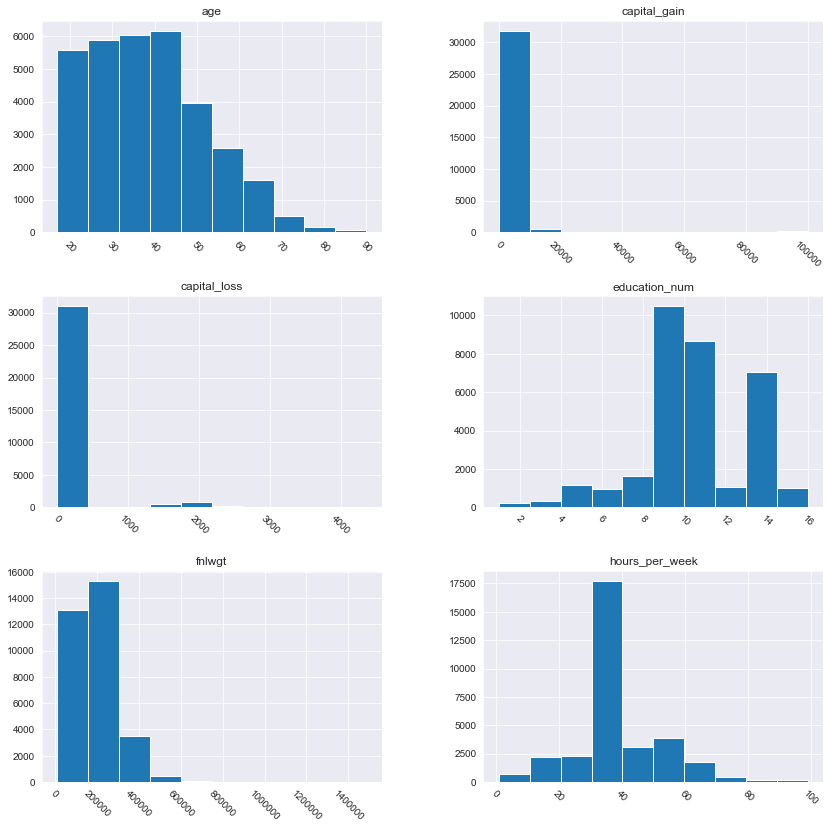

In [207]:
# Plot histogram grid
df.hist(figsize=(14,14),xrot=-45)

# Clear the text "residue"
plt.show()

capital_gain and capital_loss have unbalanced distribution

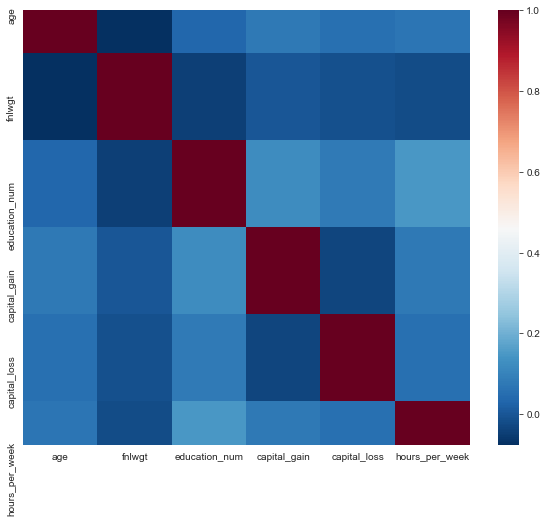

In [208]:
# Calculate correlations between numeric features
correlations = df.corr()

# Change color scheme
sns.set_style('white')

# Make the figsize 10 x 8
plt.figure(figsize=(10,8))

# Plot heatmap of correlations
sns.heatmap(correlations, cmap='RdBu_r')

No obvious correlation between input features and our label variable

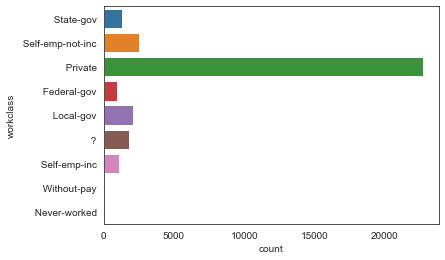

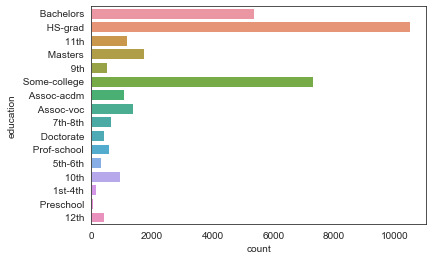

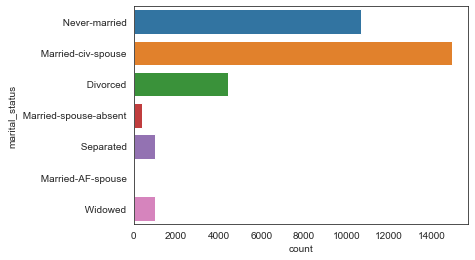

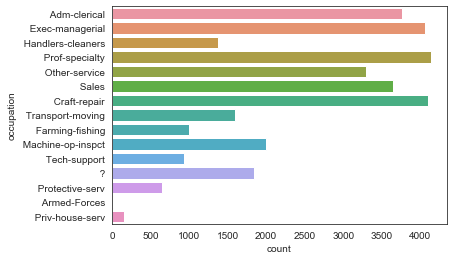

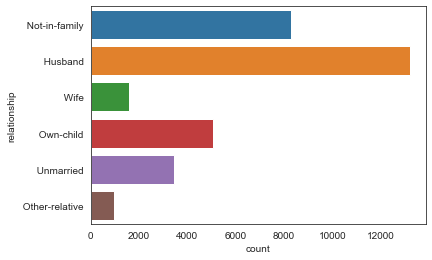

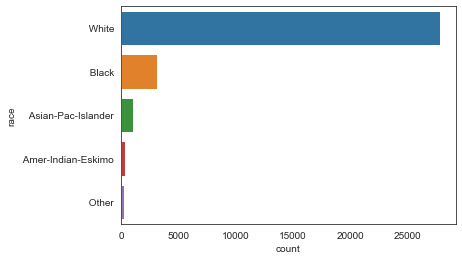

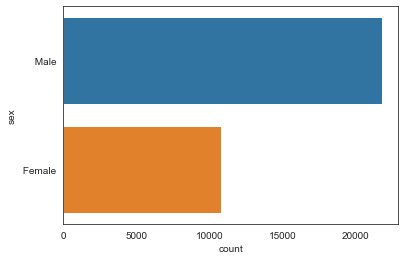

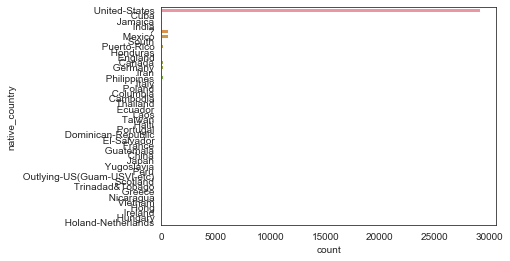

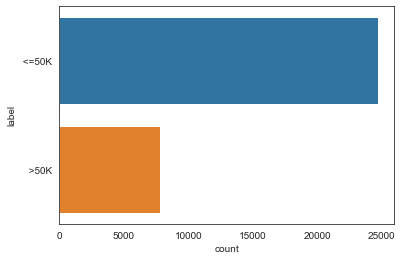

In [209]:
# Bar plot for all categorical features
for feature in df.dtypes[df.dtypes == object].index:
    sns.countplot(y=feature, data=df)
    plt.show()

Sparse classes in many categorical features. To be fix later on

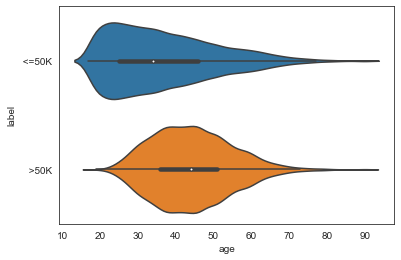

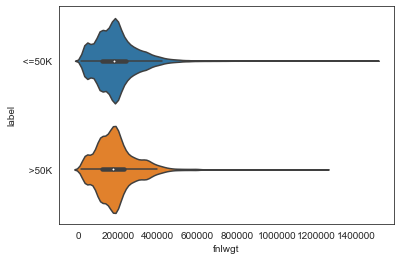

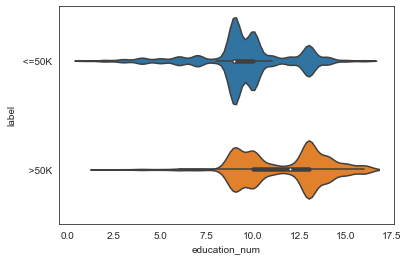

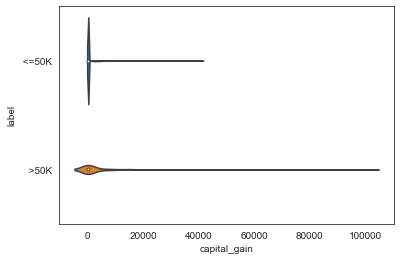

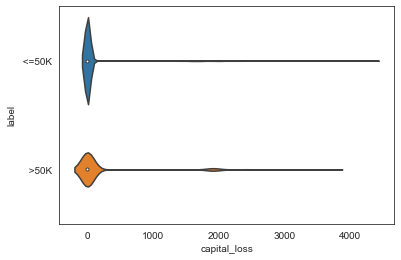

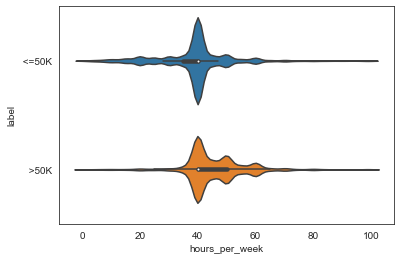

In [210]:
# Violin plot for numerical features
for feature in df.dtypes[df.dtypes == 'int64'].index:
    sns.violinplot(y= 'label', x= '{}'.format(feature), data=df)
    plt.show()

- age looks obviously a discrimating factor such as education
- capital_gain and capital_loss show outliers
- hours_per_week show a light trend that working less than 40h per week gives almost no chance to get incomes >50k

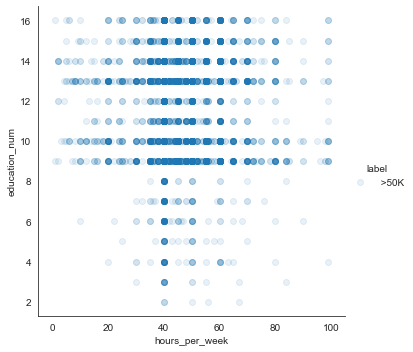

In [216]:
# Scatterplot of hoursperweeks vs. educationnum
sns.lmplot(x='hours_per_week',
          y='education_num',
          hue='label',
          data=df[df.label==' >50K'],
          fit_reg=False,
          scatter_kws={'alpha':0.1},
           height=5,
           aspect=1)
plt.show()

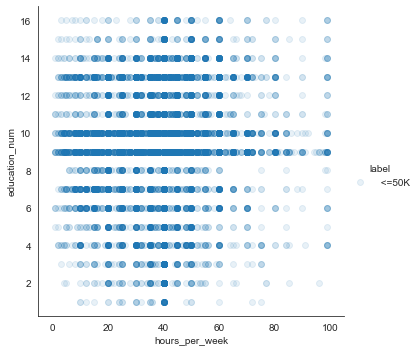

In [212]:
# Scatterplot of hoursperweeks vs. educationnum
sns.lmplot(x='hours_per_week',
          y='education_num',
          hue='label',
          data=df[df.label==' <=50K'],
          fit_reg=False,
          scatter_kws={'alpha':0.1},
           height=5,
           aspect=1)
plt.show()

- sns.lmplot with both labels are not easily readable here, so we make one plot per label.
- eductation_num > 8 gives a chance to gain more than 50 k$

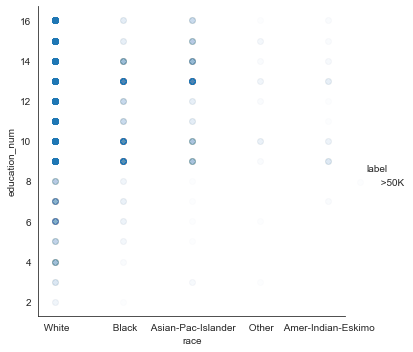

In [213]:
# Scatterplot of hoursperweeks vs. educationnum
sns.lmplot(x='race',
          y='education_num',
          hue='label',
          data=df[df.label==' >50K'],
          fit_reg=False,
          scatter_kws={'alpha':0.01},
           height=5,
           aspect=1)
plt.show()

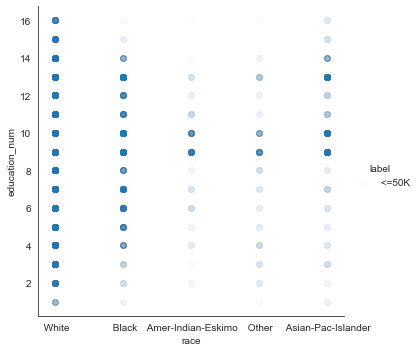

In [214]:
# Scatterplot of hoursperweeks vs. educationnum
sns.lmplot(x='race',
          y='education_num',
          hue='label',
          data=df[df.label==' <=50K'],
          fit_reg=False,
          scatter_kws={'alpha':0.01},
           height=5,
           aspect=1)
plt.show()

## Data Cleaning

NOTES FROM DATA EXPLORATION.
To be cleaned:
- "?" in most of categorical features

In [15]:
# Drop duplicated
print(df.shape)

df = df.drop_duplicates()
print( df.shape )

(32561, 15)
(32537, 15)


In [16]:
# number of ' ?' in categorical features
df.select_dtypes(include=['object'])[df.select_dtypes(include=['object'])==' ?'].count()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     582
label                0
dtype: int64

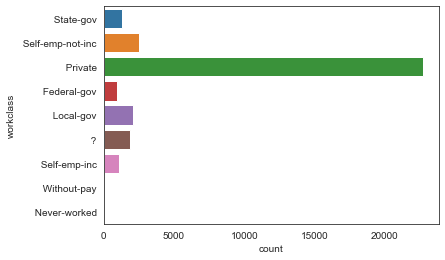

In [17]:
sns.countplot(y=df.workclass, data=df)
plt.show()

In [18]:
index_wp=df.label[df.workclass==" Without-pay"].index
print(len(index_wp))

14


In [19]:
index_nw= df.label[df.workclass==" Never-worked"].index
print(len(index_nw))

7


In [20]:
index = index_nw.append(index_wp)
print(len(index))

21


In [21]:
# We remove observations with workclass " Without-pay" and " Never-worked" as very few observations and all leading to label <50K
print(df.shape)
df.drop(index=index, axis=1, inplace=True)
print(df.shape)

(32537, 15)
(32516, 15)


## Feature Engineering

To be featured:
Some values with few amount in most of categorical features
    - native-country: need to group countries to get bigger observations
    - age: regroup ages by classes of 10 years?
    - races to be regrouped 

In [22]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
label             object
dtype: object

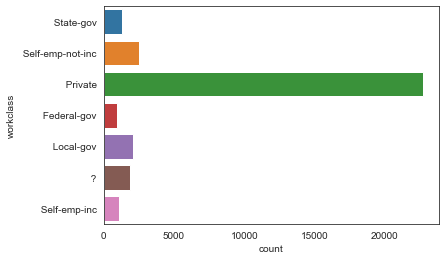

In [23]:
sns.countplot(y=df.workclass, data=df)
plt.show()

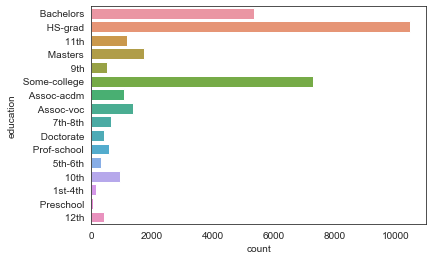

In [24]:
sns.countplot(y=df.education, data=df)
plt.show()

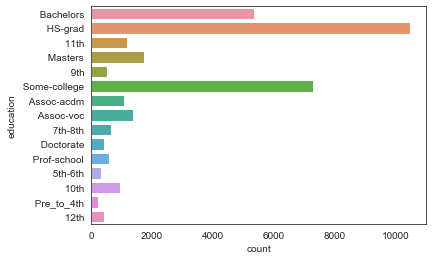

In [28]:
# Regroup " Preschool" and " 1st-4th" into " Pre_to_4th"
df.education.replace( [' 1st-4th', ' Preschool'], ' Pre_to_4th', inplace=True)

sns.countplot(y=df.education, data=df)
plt.show()

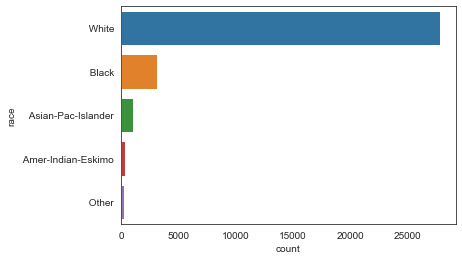

In [29]:
sns.countplot(y=df.race, data=df)
plt.show()

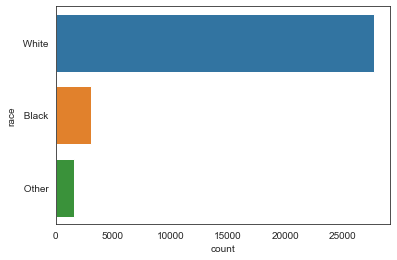

In [33]:
# regroup ' Asian-Pac-Islander', ' Amer-Indian-Eskimo'and ' Other' in 'Other'
df.race.replace( [' Asian-Pac-Islander', ' Amer-Indian-Eskimo'], ' Other', inplace=True)

sns.countplot(y=df.race, data=df)
plt.show()


In [42]:
df.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

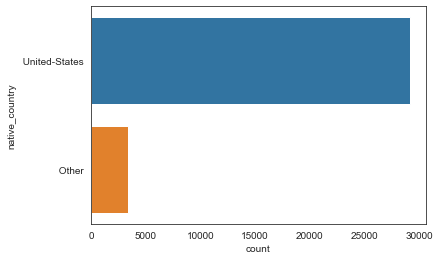

In [44]:
# Regroup other countries that US into ' Other'
df.native_country.replace( [' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'],
                          ' Other', inplace=True)
sns.countplot(y=df.native_country, data=df)
plt.show()

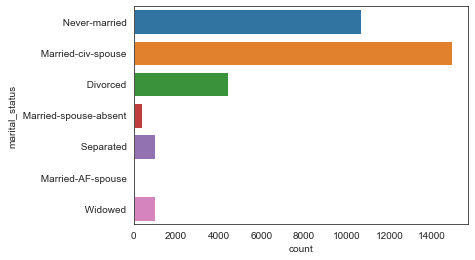

In [45]:
sns.countplot(y=df.marital_status, data=df)
plt.show()

In [50]:
(df.marital_status== ' Married-AF-spouse').sum()

23

In [53]:
df.marital_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

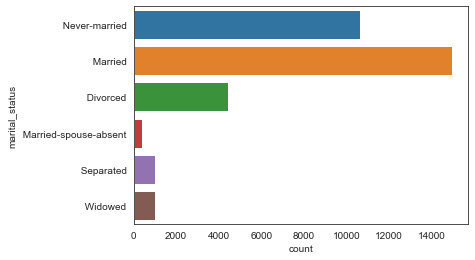

In [54]:
# regroup ' Married-civ-spouse', '  Married-civ-spouse' into ' Married'
df.marital_status.replace( [' Married-civ-spouse', ' Married-AF-spouse'], ' Married', inplace=True)

sns.countplot(y=df.marital_status, data=df)
plt.show()


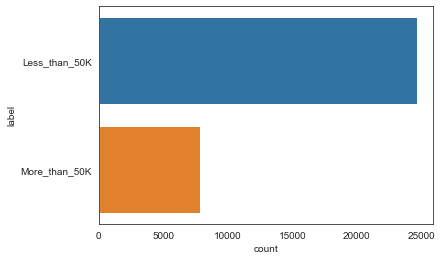

In [61]:
# Replace ' >50K' by "More_than_50K"  and replace ' <=50K' by "Less_than_50K"
df.label.replace( [' >50K'], 'More_than_50K', inplace=True)
df.label.replace( [' <=50K'], 'Less_than_50K', inplace=True)

sns.countplot(y=df.label, data=df)
plt.show()


In [66]:
df.dtypes[df.dtypes == object]

workclass         object
education         object
marital_status    object
occupation        object
relationship      object
race              object
sex               object
native_country    object
label             object
dtype: object

In [67]:
# Create dummy variables for categorical features and built abt dataframe
# 'label' feature will be the indicator variable
df['label']= pd.get_dummies(df.label).More_than_50K

abt = pd.get_dummies(df, columns=['workclass',
                                  'education',
                                  'marital_status',
                                  'occupation',
                                  'relationship',
                                  'race',
                                  'sex',
                                  'native_country'])


In [68]:
abt.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,label,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,education_ 10th,education_ 11th,education_ 12th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Pre_to_4th,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_ Other,native_country_ United-States
0,39,77516,13,2174,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
2,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1
4,28,338409,13,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0


In [71]:
# Save analytical base table
df.to_csv('analytical_base_table.csv', index=None)

## Algorithm Selection

In [73]:
# Separate dataframe into target variable y and input fearures X

y = abt.label
X= abt.drop('label', axis=1)

In [78]:
# Split dataset into train set and test set 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=222, stratify=abt.label)
print('Train set', len(X_train))
print('Test set', len(X_test))

Train set 26012
Test set 6504


In [79]:
# Build Model Pipelines with L1 and L2 regularized logistic regression, Random Forest and Gradient Boost Tree algorithm

pipelines = {
    'l1' : make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', random_state=222)),
    'l2' : make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=222)),
    'rf' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=222)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=222))
}


In [82]:
# Declare Hyperparameters grids

# Logistic Regression hyperparameters
l1_hyperparameters = {
    'logisticregression__C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
}

l2_hyperparameters = {
    'logisticregression__C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
}

# Random Forest hyperparameters
rf_hyperparameters = {
    'randomforestclassifier__n_estimators' : [100, 200],
    'randomforestclassifier__max_features' : ['auto', 'sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf' :[1, 3, 5, 10]
}

# Gradient Boost Tree hyperparameters
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators' : [100, 200],
    'gradientboostingclassifier__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth' :[1, 3, 5]
}

# Create hyperparameters dictionary
hyperparameters = {
    'l1' : l1_hyperparameters,
    'l2' : l2_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

## Model Training

In [83]:
# Fit and Tune models with Cross-Validation

# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

l1 has been fitted.
l2 has been fitted.
rf has been fitted.
gb has been fitted.


In [84]:
# Print best score (accuracy)

for name, model in fitted_models.items():
    print(name, model.best_score_)

l1 0.8488774411809934
l2 0.849261879132708
rf 0.8623712132861756
gb 0.8705597416576965


Grandient Boost Tree is having the best score with 87% accuracy

In [85]:
# Print AUROC performance

for name, model in fitted_models.items():
    
    # Predict
    pred = model.predict_proba(X_test)
    pred = [p[1] for p in pred ]
    
    # Calculate ROC curve from y and pred
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    
    # AUROC
    print(name, roc_auc_score(y_test, pred))

l1 0.9120082722108293
l2 0.9118523219660636
rf 0.9217395933251745
gb 0.9333109206000066


Grandient Boost Tree is also having the best AUROC performance with 93%

In [86]:
# Save winning model as final_model.pkl
import pickle

with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['gb'].best_estimator_, f)

## Insights & Analysis

In [260]:
# Load final_model.pkl as model
with open('final_model.pkl', 'rb') as f:
    clf = pickle.load(f)

In [261]:
# Compute the confusion matrix

pred = clf.predict(X_test)
cm = confusion_matrix(y_test, pred)
print(cm)


[[4691  245]
 [ 542 1026]]


In [262]:
# Compute confusion matrix main caractéristics
print('Correctly classified:',cm[0,0]+cm[1,1])
print('TP:', cm[1,1])
print('TN:', cm[0,0])
print('FP:',cm[0,1])
print('FN:',cm[1,0])
print('True Positive Rate (Recall):', int( 100 * cm[1,1]/(cm[1,1]+cm[1,0])), '%' )
print('False Positive Rate:', int( 100 * cm[0,1]/(cm[0,1]+cm[0,0])), '%' )
print('Precision:', int(100 * cm[1,1]/(cm[1,1]+cm[0,1])), '%')
print('F1 Score:', int(100 * f1_score(y_test, pred)), '%')
print('Accuracy:', round(100 * (cm[0,0]+cm[1,1])/len(pred),1), '%')

Correctly classified: 5717
TP: 1026
TN: 4691
FP: 245
FN: 542
True Positive Rate (Recall): 65 %
False Positive Rate: 4 %
Precision: 80 %
F1 Score: 72 %
Accuracy: 87.9 %


In [263]:
# Check accuracy on test set
(cm[0,0]+cm[1,1])/len(pred)

0.8789975399753998

Very close to what was computed by the cross validation

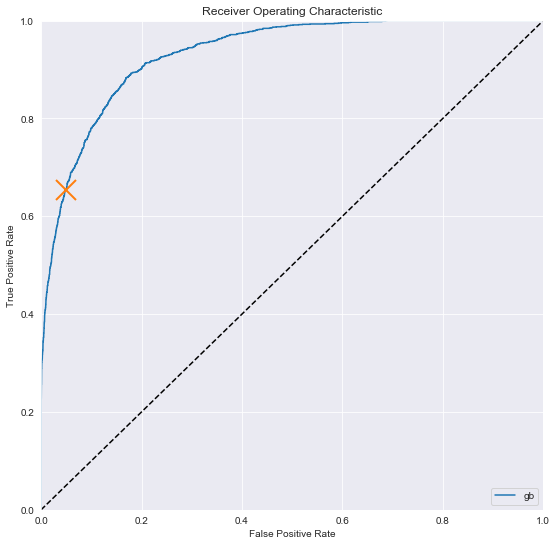

In [264]:
# Plot AUROC for gb

# Predict
pred = clf.predict_proba(X_test)
pred = [p[1] for p in pred ]
    
# Calculate ROC curve from y and pred
fpr, tpr, thresholds = roc_curve(y_test, pred)

# Initialize figure
fig = plt.figure(figsize=(9,9))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='gb')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0,1])
plt.ylim([-0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Plot Threshold of clf
plt.plot(cm[0,1]/(cm[0,1]+cm[0,0]), cm[1,1]/(cm[1,1]+cm[1,0]), marker='x', ms=20, mew=2, label = 'threshold')

plt.show()

In [265]:
# Create df Dataframe with FPR, TPR and Thresholds from clf model

df= pd.DataFrame({'FPR': fpr, 'TPR' : tpr, 'Thresholds' : thresholds})
df[(0.498<thresholds) & (thresholds<0.505)]

,FPR,TPR,Thresholds
353,0.048217,0.653699,0.504719
354,0.048217,0.654337,0.503787
355,0.050041,0.654337,0.498899
356,0.050041,0.654974,0.498848
357,0.050243,0.654974,0.498366


Defaut threshold is 0.5

In [266]:
# Search for threshold to get higher TPR (higher recall)

df[(tpr>0.9)]

,FPR,TPR,Thresholds
852,0.197934,0.900510,0.195267
853,0.198744,0.900510,0.194143
854,0.198744,0.901148,0.194130
855,0.200365,0.901148,0.191379
856,0.200365,0.901786,0.190687
...,...,...,...
1210,0.983387,1.000000,0.001164
1211,0.983793,1.000000,0.001157
1212,0.987237,1.000000,0.001093
1213,0.987642,1.000000,0.001090


Threshold = 0.195 will lead to TPR about 90% and FPR about 20%

In [267]:
# Compute another confusion matrix with Threshold=0.195

pred = clf.predict_proba(X_test)
pred = [p[1] for p in pred]  # Positive class (1) probabilities
pred_2 = (np.array(pred) > 0.195).astype(int)
cm_2 = confusion_matrix(y_test, pred_2)
print(cm_2)

[[3959  977]
 [ 156 1412]]


In [268]:
# Compute confusion matrix main caractéristics
print('Correctly classified:',cm_2[0,0]+cm_2[1,1])
print('TP:', cm_2[1,1])
print('TN:', cm_2[0,0])
print('FP:',cm_2[0,1])
print('FN:',cm_2[1,0])
print('True Positive Rate (Recall):', int( 100 * cm_2[1,1]/(cm_2[1,1]+cm_2[1,0])), '%' )
print('False Positive Rate:', int( 100 * cm_2[0,1]/(cm_2[0,1]+cm_2[0,0])), '%' )
print('Precision:', int(100 * cm_2[1,1]/(cm_2[1,1]+cm_2[0,1])), '%')
print('F1 Score:', int(100 *f1_score(y_test, pred_2)), '%')
print('Accuracy:', round(100 * (cm_2[0,0]+cm_2[1,1])/len(pred_2),1), '%')

Correctly classified: 5371
TP: 1412
TN: 3959
FP: 977
FN: 156
True Positive Rate (Recall): 90 %
False Positive Rate: 19 %
Precision: 59 %
F1 Score: 71 %
Accuracy: 82.6 %


We get higher TPR but overall accuracy is lower

In [269]:
# Search for threshold to get better equilibrium between TPR and FPR

df[(tpr>0.8)]

,FPR,TPR,Thresholds
614,0.115073,0.800383,0.322937
615,0.115681,0.800383,0.321234
616,0.115681,0.801020,0.321041
617,0.116086,0.801020,0.319899
618,0.116086,0.801658,0.319864
...,...,...,...
1210,0.983387,1.000000,0.001164
1211,0.983793,1.000000,0.001157
1212,0.987237,1.000000,0.001093
1213,0.987642,1.000000,0.001090


Threshold = 0.322 will lead to TPR about 80% and FPR about 11%

In [270]:
# Compute another confusion matrix with Threshold=0.322

pred = clf.predict_proba(X_test)
pred = [p[1] for p in pred]  # Positive class (1) probabilities
pred_3 = (np.array(pred) > 0.322).astype(int)
cm_3 = confusion_matrix(y_test, pred_3)
print(cm_3)

[[4367  569]
 [ 313 1255]]


In [271]:
# Compute confusion matrix main caractéristics
print('Correctly classified:',cm_3[0,0]+cm_3[1,1])
print('TP:', cm_3[1,1])
print('TN:', cm_3[0,0])
print('FP:',cm_3[0,1])
print('FN:',cm_3[1,0])
print('True Positive Rate (Recall):', int( 100 * cm_3[1,1]/(cm_3[1,1]+cm_3[1,0])), '%' )
print('False Positive Rate:', int( 100 * cm_3[0,1]/(cm_3[0,1]+cm_3[0,0])), '%' )
print('F1 Score:', int(100 *f1_score(y_test, pred_3)), '%')
print('Accuracy:', round(100 * (cm_3[0,0]+cm_3[1,1])/len(pred_3),1), '%')

Correctly classified: 5622
TP: 1255
TN: 4367
FP: 569
FN: 313
True Positive Rate (Recall): 80 %
False Positive Rate: 11 %
F1 Score: 73 %
Accuracy: 86.4 %


So which threshold should we define?
Well it depends on the "problem" we want to solve with this dataset.
Let's imagine that the purpose is to fight against tax evasion. We could use this kind of classification model to built a candidate list of taxpayers for a tax audit.
An efficient way would be to have a candidate list with people supposed to have high incomes. Then we prefer a model that minimise the False Positive Rate (threshold=0.5 or lower). It won't be a problem if the model misses many people with high incomes providing that the list contains few people with few incomes.

#### Findings:
- The best model for this dataset appears to be the Gradient Boost Tree (AUROC score: 93%), but all in all, Random Forest  (AUROC score: 92%)but also regularized regression L1 and L2 (AUROC score: 91%) gave almost similar performance.
- By defaut, confusion_matrix from sklearn uses threshold 0.5. It shown a good result in terms of straight accuracy but we saw we might prefer another threshold depending on the balance we want between TPR and FPR.
- Straight accuracy of the Gradient Boost Tree on the Test set was 87.9%. This is very close to the performance achieved by Navoneel Chakrabarty in a paper (https://www.researchgate.net/publication/328494313_A_Statistical_Approach_to_Adult_Census_Income_Level_Prediction - 2018) which to pretend breaking the benchmark on this dataset (note that this paper was unseen before the end of my project). AUROC Score is similar in my model but Recall and Precision are much less good (which is extremly surprising by the way because AUROC score are same and AUROC Curve look very simalar as well! So FPR/TPR trade off should be approximately the same) 
- With addition time, it would be interesting to try to improve the model acurcay with more feature enginering (remove features that look redundant such as education_num...) and try to beat 2018 paper.